In [85]:
import pygad
import pandas as pd

przedmioty = pd.read_csv('./plecak.csv')
print(przedmioty)


          przedmiot  wartosc  waga
0             zegar      100     7
1      obraz-pejzaż      300     7
2     obraz-portret      200     6
3             radio       40     2
4            laptop      500     5
5      lampka nocna       70     6
6   srebrne sztućce      100     1
7         porcelana      250     3
8    figura z brązu      300    10
9   skózana torebka      280     3
10        odkurzacz      300    15


potrzebne paczki

In [86]:
S = [
    ("zegar", 100, 7),
    ("obraz-pejzaż", 300, 7),
    ("obraz-portret", 200, 6),
    ("radio", 40, 2),
    ("laptop", 500, 5),
    ("lampka nocna", 70, 6),
    ("srebrne sztućce", 100, 1),
    ("porcelana", 250, 3),
    ("figura z brązu", 300, 10),
    ("skórzana torebka", 280, 3),
    ("odkurzacz", 300, 15)
]

values = []
for value in S:
    values.append(value[1])

weights = []
for weight in S:
    weights.append(weight[2])

print(values)
print(weights)

gene_space = [0, 1]

[100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
[7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]


geny to liczby 0 lub 1

In [87]:
def fitness_func(solution, solution_idx):
    x = 0
    sum = 0
    fitness = 0
    weight = 0
    for i in solution:
        if (i == 1.0):
            sum += values[x]
            weight += weights[x]
        x += 1
    if (weight <= 25):
        fitness = sum
    return fitness

fitness_function = fitness_func


funkcja fitness

In [88]:
sol_per_pop = 10
num_genes = len(S)

ile chromsomów w populacji
ile genow ma chromosom

In [89]:
num_parents_mating = 5
num_generations = 30
keep_parents = 2

ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
ile pokolen
ilu rodzicow zachowac (kilka procent)

In [90]:
parent_selection_type = "sss"

jaki typ selekcji rodzicow?:
sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa

In [91]:
crossover_type = "single_point"

w ilu punktach robic krzyzowanie?

In [92]:
mutation_type = "random"
mutation_percent_genes = 10

mutacja ma dzialac na ilu procent genow?
trzeba pamietac ile genow ma chromosom

In [93]:
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty

In [94]:
ga_instance.run()

uruchomienie algorytmu

In [95]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630


podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)

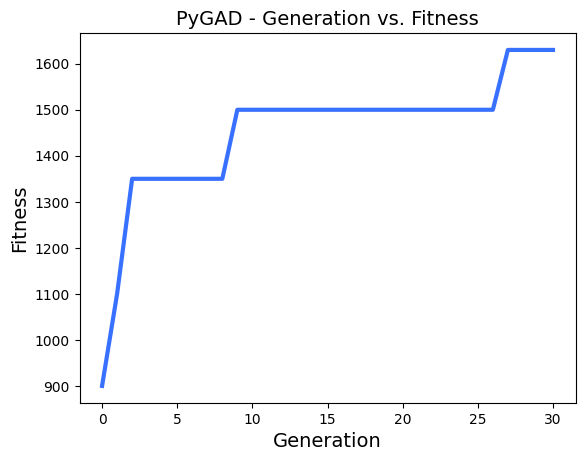

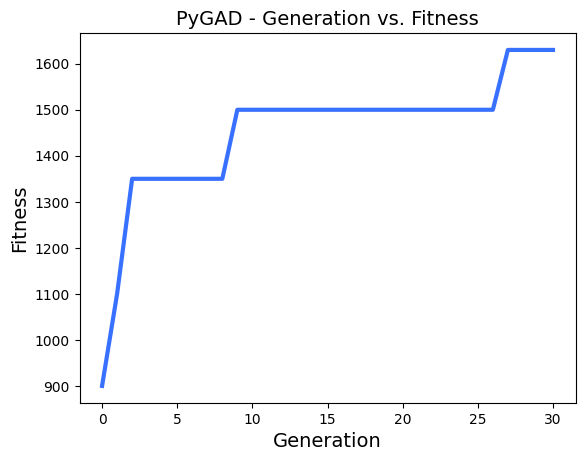

In [96]:
ga_instance.plot_fitness()